In [2]:
def modelCircle(b, c, d):
  temp = c[0]**2 + c[1]**2
  bc = (b[0]**2 + b[1]**2 - temp) / 2
  cd = (temp - d[0]**2 - d[1]**2) / 2
  det = (b[0] - c[0]) * (c[1] - d[1]) - (c[0] - d[0]) * (b[1] - c[1])

  if abs(det) < 1.0e-10:
    return None

  # Center of circle
  cx = (bc*(c[1] - d[1]) - cd*(b[1] - c[1])) / det
  cy = ((b[0] - c[0]) * cd - (c[0] - d[0]) * bc) / det

  radius = ((cx - b[0])**2 + (cy - b[1])**2)**.5

  return cx,cy,radius

def shrtDis(p,x,y,r):
    import numpy as np
    re= np.array(abs(((p[:,0]-x)**2+(p[:,1]-y)**2)**0.5-r))
    return re

In [164]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b =-1, 2
x = np.linspace(-12, 12 , half_n )
y = m*x + b + s*np . random. randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )








#result = np.where(PO<1)


0.4144528807439253 42
0.4047663583468345 41
0.40442860361861055 43
0.3896558056444026 41
0 0


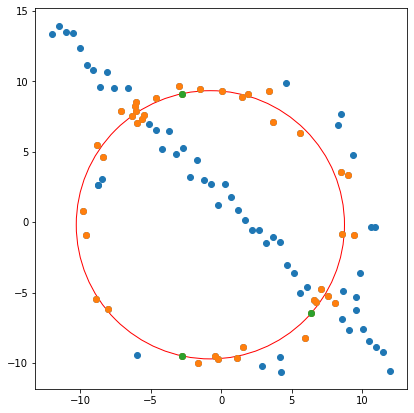

In [165]:
best=np.Infinity
v,m,R,ranL=0,0,0,[]

for i in range(400):
    #L=np.random.random_integers(0,99,size=3)
    L=np.random.choice(100, size=3, replace=False)
    
  
    x,y,r=modelCircle(X[L[0]],X[L[1]],X[L[2]])
    PO=shrtDis(X,x,y,r)
    if r>20:
        continue
    inliares=X[PO<1]
    if inliares.size>80:
        
        me=shrtDis(inliares,x,y,r)
        mean = sum(me/me.size)
        if mean < best:
            print(mean,me.size)
            best=mean
            ranL=L
            

x,y,r=modelCircle(X[ranL[0]],X[ranL[1]],X[ranL[2]])
PO=shrtDis(X,x,y,r)
bestInlier=X[PO<1]
fig,ax=plt.subplots(figsize=(7,7))

c=plt.Circle((x,y),r,fill=False)
c.set_color("r")
ax.set_aspect( 1 )
ax.add_artist( c )
ax.scatter(X[:,0],X[:,1])
ax.scatter(bestInlier[:,0],bestInlier[:,1])
Y=np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
ax.scatter(Y[:,0],Y[:,1])
print(v,m)



In [178]:
def ransac(Data,N,t,n):
    best=np.Infinity
    output=[]

    for i in range(N):
        rndPoints=np.random.choice(Data.size//2, size=3, replace=False)
        x,y,r=modelCircle(Data[rndPoints[0]],Data[rndPoints[1]],Data[rndPoints[2]])
        PO=shrtDis(Data,x,y,r)
        if r>max(Data[:,1])*1.5:
            continue
        inliares=Data[PO<t]
        if inliares.size/2>n:
            
            me=shrtDis(inliares,x,y,r)
            mean = sum(me/me.size)
            if mean < best:
               
                best=mean
                output=rndPoints
                inli=inliares
   
    return output,inli
def plotCiircle(Data,Datalst,color='r'):
    x,y,r=modelCircle(Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]])
    c=plt.Circle((x,y),r,fill=False)
    c.set_color(color)
    return c


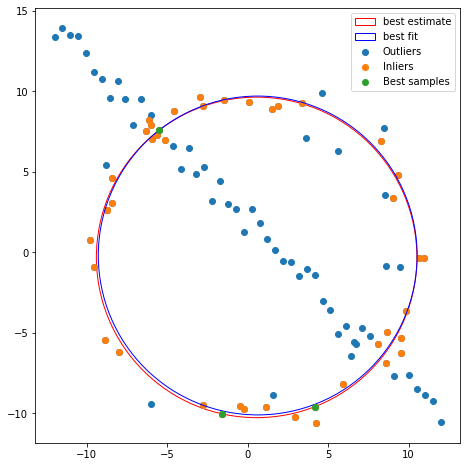

In [187]:
ranL,bestInlier=ransac(X,500,1,40)          
c=plotCiircle(ranL,X)
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c )
p1=ax.scatter(X[:,0],X[:,1])
p2=ax.scatter(bestInlier[:,0],bestInlier[:,1])
bestfit,inl=ransac(bestInlier,50,1,bestInlier.size//2.2)
c2=plotCiircle(bestfit,bestInlier,'b')
ax.add_artist( c2 )
Y=np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
p3=ax.scatter(Y[:,0],Y[:,1])
plt.legend(handles=[c, c2,p1,p2,p3],labels=['best estimate','best fit','Outliers','Inliers','Best samples'])
plt.show()

In [212]:
def ransac2(Data,N,t,n):
    maxi=0
    output=np.array([])

    for i in range(N):
        rndPoints=np.random.choice(Data.size//2, size=3, replace=False)
        x,y,r=modelCircle(Data[rndPoints[0]],Data[rndPoints[1]],Data[rndPoints[2]])
        PO=shrtDis(Data,x,y,r)
        if r>max(Data[:,1])*1.5:
            continue
        inliares=Data[PO<t]
        if len(inliares)>n:
            
            
            
               
            me=shrtDis(inliares,x,y,r)
            mean = sum(me/me.size)
            if maxi < len(inliares):
               
                best=mean
                output=rndPoints
                inli=inliares
            elif maxi== len(inliares) and best>mean:
                best=mean
                output=rndPoints
                inli=inliares

                
    return output,inli

    

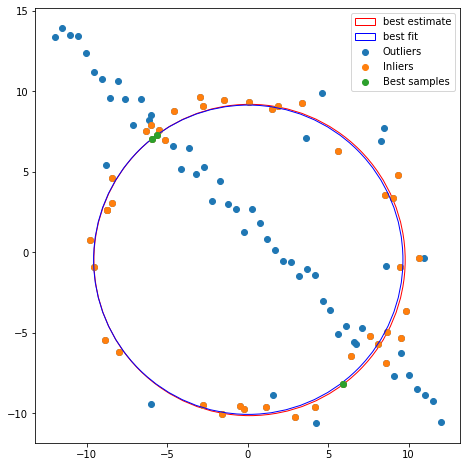

In [219]:
ranL,bestInlier=ransac2(X,500,1,40)          
c=plotCiircle(ranL,X)
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c )
p1=ax.scatter(X[:,0],X[:,1])
p2=ax.scatter(bestInlier[:,0],bestInlier[:,1])
bestfit,inl=ransac2(bestInlier,50,1,bestInlier.size//2.2)
c2=plotCiircle(bestfit,bestInlier,'b')
ax.add_artist( c2 )
Y=np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
p3=ax.scatter(Y[:,0],Y[:,1])
plt.legend(handles=[c, c2,p1,p2,p3],labels=['best estimate','best fit','Outliers','Inliers','Best samples'])
plt.show()

In [ ]:
print()